QUESTION 1

1) The distributions for p(x) and p(y) are Gaussian distributions
2) Probability of a livable wage out of college (counting method): 0.0
3) Probability of a livable wage out of college (integration): 0.0
4) Probability of a livable wage out of college AS A DATA SCIENTIST(integration method): 1.0
5) Probability of being top 10 earner out of college AS A DATA SCIENTIST: 0.5218258576116872
6) GIVEN the fact that there is a 100% chance of having a livable wage as a data scientist, I strive to become a data scientist and will achieve that goal by working hard in Prof Wu's class, especially considering the fact that not being a data scientist, there is 0% chance of making a livable wage based on the data! Essentially, the data shows that being a data scientist is better to sustain yourself financially.   

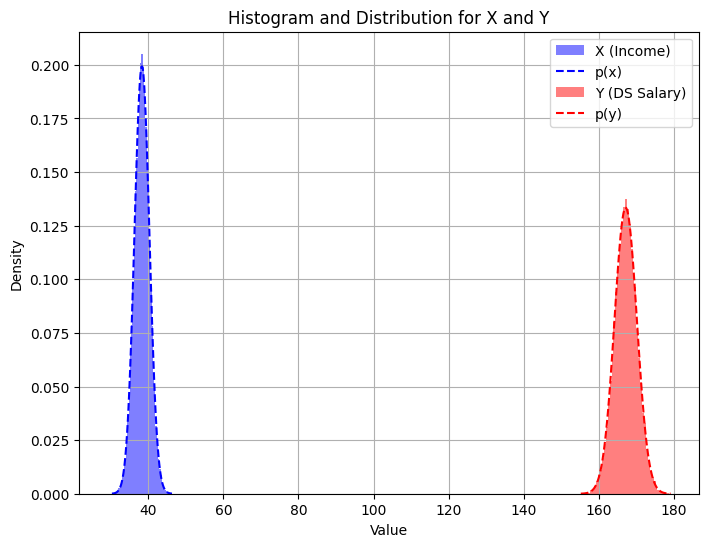

Probability of making a livable wage right out of college (counting method): 0.0
Probability of making a livable wage right out of college (integration method): 0.0
Probability of making a livable wage right out of college AS A DATA SCIENTIST(integration method): 1.0
Probability of becoming top 10 earner right out of college AS A DATA SCIENTIST: 0.5218258576116872


In [ ]:
# QUESTION 1 PART 1
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.stats import norm

X = np.reshape(genfromtxt('young_adult_income.csv', delimiter='\n'), (-1,1))
Y = np.reshape(genfromtxt('entry_level_DS_salary.csv', delimiter='\n'), (-1,1))

mean_X = np.mean(X)
mean_Y = np.mean(Y)
sd_X = 2
sd_Y = np.std(Y)
x = np.linspace(mean_X - 4 * sd_X, mean_X + 4 * sd_X, 100)
y = np.linspace(mean_Y - 4 * sd_Y, mean_Y + 4 * sd_Y, 100)

def prob_dens_func(a, mu, sd):
    return (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((a - mu) / sd) ** 2)

px = prob_dens_func(x, mean_X, sd_X)

py = prob_dens_func(y, mean_Y, sd_Y)

plt.figure(figsize=(8, 6))
plt.hist(X, bins=50, alpha=0.5, color='b', label='X (Income)', density=True)
plt.plot(x, px, 'b--', label='p(x)')
plt.hist(Y, bins=50, alpha=0.5, color='r', label='Y (DS Salary)', density=True)
plt.plot(y, py, 'r--', label='p(y)')
plt.title('Histogram and Distribution for X and Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# QUESTION 1 PART 2
# counting method : count the number of ppl above the range and divide by the number of all people in the dataset.
livable_wage_threshold = 57.2 
num_more_than_livable = np.sum(X >= livable_wage_threshold)
total_ppl = len(X)
livable_wage_prob_counting = num_more_than_livable / total_ppl
print("Probability of making a livable wage right out of college (counting method):", livable_wage_prob_counting)

# QUESTION 1 PART 3
# integration method : use cdf to calculate the area under the density function
livable_wage_prob_integration = 1 - norm.cdf(livable_wage_threshold, mean_X, sd_X)

print("Probability of making a livable wage right out of college (integration method):", livable_wage_prob_integration)

# QUESTION 1 PART 4
# integration method : use cdf to calculate the area under the density function
livable_wage_prob_ds_integration = 1 - norm.cdf(livable_wage_threshold, mean_Y, sd_Y)

print("Probability of making a livable wage right out of college AS A DATA SCIENTIST(integration method):", livable_wage_prob_ds_integration)

# QUESTION 1 PART 5
# integration method : use cdf to calculate the area under the density function
prob_ds_top_earner = 1 -  norm.cdf(167, mean_Y, sd_Y)
print("Probability of becoming top 10 earner right out of college AS A DATA SCIENTIST:", prob_ds_top_earner)

QUESTION 2
1) Plotted X, Y, and Z. X and Y are gaussian distributions, while Z is not (modelled with uniform)
2) Accept Y: visually, Y population's blood molecule distribution matches Population X's, which is the one we know to be the cure to the disease. 
3) ε is a cutoff boundary for us to discern whether a population's distribution is similar to X or dissimilar. Since KL divergence measures how similar two distributions are, if we take the midpoint of the KL divergence for X and Y, something that will be essentially 0 since X and Y are the same distribution, and the KL divergence for X and Z, something that will be large since X and Z are completely different distributions, we can classify other populations by saying that if the KL divergence between X and a new population is below ε, then its closer to X's distribution and can be grouped as such, whereas if the KL is above ε, its more dissimilar to X's distribution and should be classified as such.  

KL(X || Y) with Integration: 0.000
KL(X || Z) with Integration:10.794
KL(X || Y) with Sampling: 0.001
KL(X || Z) with Sampling: 10.797
Threshold ε: 5.397185995581105

4) According to Grace's Theory of Entropy, Population Q is to be grouped with Population Z in the group of populations that will kill a human. 
Grace's Theory was correct, Populations X and Y have almost the exact same entropy and they are the basically the same distribution, whereas Populations Z and Q have almost the exact same entropy entropies and indeed have similar distributions. So yes, Grace should get a raise, her theory was proven true here! 

X Entropy by Integral: 0.718
X Entropy by Sampling: 0.718 

Y Entropy by Integral: 0.715
Y Entropy by Sampling: 0.720 

Z Entropy by Integral: 0.035
Z Entropy by Sampling: 0.040 

Q Entropy by Integral: 0.035
Q Entropy by Sampling: 0.035 


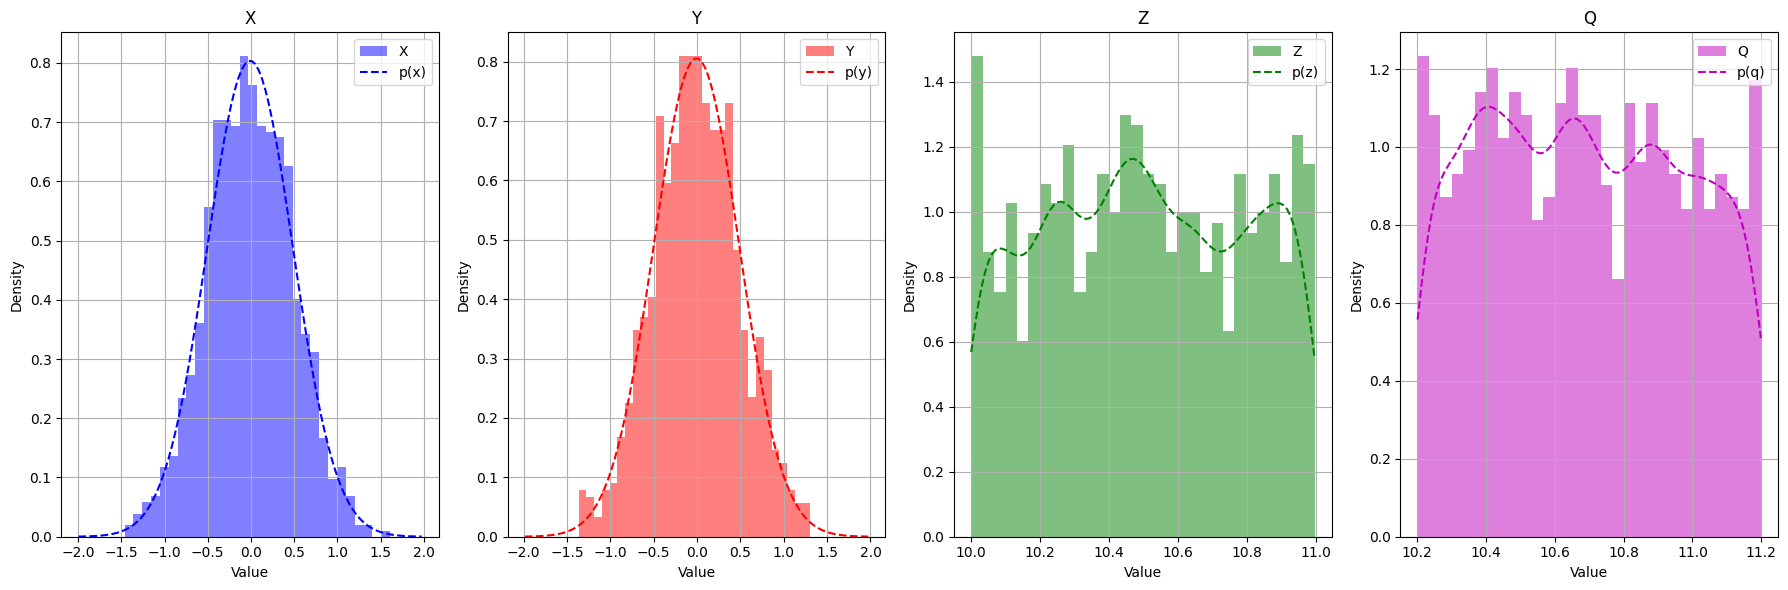

In [169]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.stats import norm

# QUESTION 2 PART 1 - Plot out Histogrmas
X = np.reshape(genfromtxt('population_X.csv', delimiter='\n'), (-1,1))
Y = np.reshape(genfromtxt('population_Y.csv', delimiter='\n'), (-1,1))
Z = np.reshape(genfromtxt('population_Z.csv', delimiter='\n'), (-1,1))
Q = np.reshape(genfromtxt('population_Q.csv', delimiter='\n'), (-1,1))

mean_X, sd_X = np.mean(X), np.std(X)
mean_Y, sd_Y = np.mean(Y), np.std(Y)
mean_Z, sd_Z = np.mean(Z), np.std(Z)

mean_Q, sd_Q = np.mean(Q), np.std(Q)

x = np.linspace(mean_X - 4 * sd_X, mean_X + 4 * sd_X, 100)
y = np.linspace(mean_Y - 4 * sd_Y, mean_Y + 4 * sd_Y, 100)
z = np.linspace(np.min(Z), np.max(Z), 100)
q = np.linspace(np.min(Q), np.max(Q), 100)

def uniform(a, b, x):
    return np.where((a <= x) & (x <= b), 1 / (b - a), 0)

def px(x):
    return gaussian(mean_X, sd_X, x)

def py(y):
    return gaussian(mean_Y, sd_Y, y)

def gaussian(μ, σ, x):
    return (np.exp(-(x-μ)**2/(2*σ**2)))/(np.sqrt(2*np.pi)*σ) + 0.00001

def pz(z):
    sigma = 0.05
    n = len(Z)
    kde = 0
    for j in range(n):
        kde += gaussian(Z[j], sigma, z)
    kde /= n
    kde = np.maximum(kde, 0.00001)
    return kde

def pq(q):
    sigma = 0.05
    n = len(Q)
    kde = 0
    for j in range(n):
        kde += gaussian(Q[j], sigma, q)
    kde /= n
    kde = np.maximum(kde, 0.00001)
    return kde

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.hist(X, bins=30, alpha=0.5, color='b', label='X', density=True)
plt.plot(x, px(x), 'b--', label='p(x)')
plt.title('X')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 2)
plt.hist(Y, bins=30, alpha=0.5, color='r', label='Y', density=True)
plt.plot(y, py(y), 'r--', label='p(y)')
plt.title('Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 3)
plt.hist(Z, bins=30, alpha=0.5, color='g', label='Z', density=True)
plt.plot(z, pz(z), 'g--', label='p(z)')
plt.title('Z')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 4)
plt.hist(Q, bins=30, alpha=0.5, color='m', label='Q', density=True)
plt.plot(q, pq(q), 'm--', label='p(q)')
plt.title('Q')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [122]:
from scipy.integrate import quad

# QUESTION 2 PART 3 - KL Divergences
def kl_divergence(p, q, x):
    return np.sum(p(x) * np.log((p(x)) / (q(x))))

# scipy integration for KL divergence
kl_divergence_integral_XY, _ = quad(lambda x: kl_divergence(px, py, x), -20, 20)
kl_divergence_integral_XZ, _ = quad(lambda x: kl_divergence(px, pz, x), -20, 20)

print ("KL(X || Y) with Integration: %.3f" %kl_divergence_integral_XY)
print ("KL(X || Z) with Integration:%.3f" %kl_divergence_integral_XZ)

n_samples = 100000

# gen samples
samples_x = np.random.normal(mean_X, sd_X, n_samples)  
samples_y = np.random.normal(mean_Y, sd_Y, n_samples)  
samples_z = uniform(min(Z), max(Z), n_samples) # use a uniform distribution to generate samples!

kl_divergence_sampling_XY = np.mean(np.log((px(samples_x)) / (py(samples_y))))
kl_divergence_sampling_XZ = np.mean(np.log((px(samples_x)) / (pz(samples_z))))

print ("KL(X || Y) with Sampling: %.3f" % kl_divergence_sampling_XY)
print ("KL(X || Z) with Sampling: %.3f" % kl_divergence_sampling_XZ)

epsilon = (kl_divergence_integral_XY + kl_divergence_integral_XZ) / 2

print("Threshold ε:", epsilon)


KL(X || Y) with Integration: 0.000
KL(X || Z) with Integration:10.795
KL(X || Y) with Sampling: 0.002
KL(X || Z) with Sampling: 10.795
Threshold ε: 5.397359626603827


In [171]:
from scipy.integrate import quad
import math
# QUESTION 2 PART 4 - Entropy
n_samples = 100000
samples_X = np.random.normal(mean_X, sd_X, n_samples)
samples_Y = np.random.normal(mean_Y, sd_Y, n_samples)
# REJECTION SAMPLING FOR Z AND Q
q_values = pz(z)
k = 2
max_k_q_x = k * q_values.max()
N = len(Z)
samples_rejection = []

while len(samples_rejection) < N:
    u = np.random.uniform(min(Z), max(Z))  # sample from q(x)
    v = np.random.uniform(0, max_k_q_x)  # sample from uniform(0, max_k_q_x)
    if v <= k * pz(u):  # Accept ONLY if v < k * q(u)
        samples_rejection.append(u)

samples_Z = np.array(samples_rejection)

# Samples using rejection sampling
q_values = pq(q)
k = 2
max_k_q_x = k * q_values.max()
N = len(Q)
samples_rejection = []

while len(samples_rejection) < N:
    u = np.random.uniform(min(Q), max(Q)) # sample from q(x)
    v = np.random.uniform(0, max_k_q_x)  # sample from uniform(0, max_k_q_x)
    if v <= k * pq(u):  # Accept ONLY if v < k * q(u)
        samples_rejection.append(u)

samples_Q = np.array(samples_rejection)

def entropy_sampling(probabilities):
    log_probabilities = np.log(1 / probabilities)
    return max(np.mean(log_probabilities), 0)


# X Entropy by Integral
x_entropy_int, _ = quad(lambda x: -px(x) * math.log(px(x)) if px(x) > 0 else 0, -2, 2)
print ("X Entropy by Integral: %.3f" %x_entropy_int)
# X Entropy by Sampling
print ("X Entropy by Sampling: %.3f" %entropy_sampling(px(samples_x)),  '\n')


# Y Entropy by Integral
y_entropy_int, _ = quad(lambda x: -py(x) * math.log(py(x)) if py(x) > 0 else 0,  -2, 2)
print ("Y Entropy by Integral: %.3f" %y_entropy_int)
# Y Entropy by Sampling
print ("Y Entropy by Sampling: %.3f" %entropy_sampling(py(samples_y)),  '\n')


# Z Entropy by Integral
z_entropy_int, _ = quad(lambda x: -pz(x) * np.log(pz(x)) if pz(x) > 0 else 0,  10, 11)
print ("Z Entropy by Integral: %.3f" % z_entropy_int)
# Z Entropy by Sampling
print ("Z Entropy by Sampling: %.3f" %entropy_sampling(pz(samples_Z)),  '\n')


# Q Entropy by Integral
q_entropy_int, _ = quad(lambda x: -pq(x) * np.log(pq(x)) if pq(x) > 0 else 0,  10.2, 11.2)
print ("Q Entropy by Integral: %.3f" % q_entropy_int)
# Q Entropy by Sampling
print ("Q Entropy by Sampling: %.3f" % entropy_sampling(pq(samples_Q)),  '\n')



X Entropy by Integral: 0.718
X Entropy by Sampling: 0.718 

Y Entropy by Integral: 0.715
Y Entropy by Sampling: 0.720 

Z Entropy by Integral: 0.035
Z Entropy by Sampling: 0.040 

Q Entropy by Integral: 0.035
Q Entropy by Sampling: 0.035 



QUESTION 3

MY MODEL IMPLEMENTATIONS WITH ACCURACIES

1) KNN 
training accuracy: 0.874
validation accuracy: 0.877
test accuracy:   0.735

2) LOGISTIC REGRESSION
training accuracy: 0.984
validation accuracy: 0.991
test accuracy: 0.929

3) SVM
training accuracy: 0.859
validation accuracy: 0.855
test accuracy:  0.791

4) RANDOM FOREST 
training accuracy: 0.921
validation accuracy: 0.939
test accuracy: 0.823

5) Based on the validiation results, I would choose the logistic regression as it performed the best and therefore should be used to best predict the chance of breast cancer based on the data. 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from numpy import ndarray
from enum import Enum
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

# 80 - 10 - 10 split into train test validate
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# use standard scaler to normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_train)
X_val = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_val)
X_test = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_test)

class KNN:
    def __init__(self, k=None):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        if self.k is None:
            self.k = int(np.sqrt(len(self.X_train)))
        y_pred = []
        for x in X:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = np.argmax(np.bincount(k_nearest_labels))
            y_pred.append(most_common)
        return np.array(y_pred)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        for _ in range(self.max_iter):
            linear_model = np.dot(X_train, self.weights)
            y_pred = self.sigmoid(linear_model)
            gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_pred = self.sigmoid(linear_model)
        return np.round(y_pred).astype(int)

knn_model = KNN()
knn_model.fit(X_train, y_train)

y_pred_train = knn_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("KNN Training Accuracy:", accuracy_train)

y_pred_val = knn_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("KNN Validation Accuracy:", accuracy_val)

y_pred_test = knn_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("KNN Test Accuracy:", accuracy_test)

# Train and evaluate Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred_train = log_reg_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Logistic Regression Training Accuracy:", accuracy_train)

y_pred_val = log_reg_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Logistic Regression Validation Accuracy:", accuracy_val)

y_pred_test = log_reg_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Logistic Regression Test Accuracy:", accuracy_test)


class SVM:
    def __init__(self, learning_rate=0.01, num_iterations=5000):  
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def calculate_b(self, X, y):
        X0 = X[y == 0]
        X1 = X[y == 1]
        min_distance = float('inf')
        for x0 in X0:
            for x1 in X1:
                temp_distance = np.dot(x0, self.w) + np.dot(x1, self.w) / 2
                if temp_distance < min_distance:
                    min_distance = temp_distance
        return -min_distance

    def dw(self, X, y, w):
        return 2 * w - X.T.dot(y)
   
    def svm_sgd(self, X, Y):
        w = np.zeros(len(X[0]))
        eta = 1
        for epoch in range(1, self.num_iterations):
            for i, x in enumerate(X):
                if (Y[i]*np.dot(X[i], w)) < 1:
                    w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                else:
                    w = w + eta * (-2  *(1/epoch)* w)
        return w

    def fit(self, X, y):
        self.w = self.svm_sgd(X, y)
        self.w = self.w / np.linalg.norm(self.w)
        self.b = self.calculate_b(X, y)  
    
    def predict(self, X):
        signed = np.sign(np.dot(X, self.w) - self.b)
        return [1 if i == 0 else 1 for i in signed]
        
    
svm = SVM()
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)
y_test_pred = svm.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("SVM Train accuracy:", accuracy_train)
print("SVM Validation accuracy:", accuracy_val)
print("SVM Test accuracy:", accuracy_test)



class Node():
    def __init__(self, data, feature_idx, feature_val, y_probs, information_gain) -> None:
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.y_probs = y_probs
        self.information_gain = information_gain
        self.feature_importance = self.data.shape[0] * self.information_gain
        self.left = None
        self.right = None


class RandomForest():
    def __init__(self, n_tree=10, min_samples_leaf=1, min_information_gain=0.0) -> None:
        self.n_tree = n_tree
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain

    def feature_importance(self, trees):
        """ calcs avg feature importance for random forest"""
        tree_feature_importance = []
        for tree in trees:
            tree_feature_importance.append(tree.feature_importances)
        all_feature_importances = [list(x.values()) for x in tree_feature_importance]
        average_feature_importance = np.mean(all_feature_importances, axis=0)

        return average_feature_importance
    
    def train(self, X_train: np.array, Y_train: np.array) -> None:        
            self.tree_list = []
            for _ in range(self.n_tree):
                tree = DecisionTree(min_samples_leaf=self.min_samples_leaf,
                                            min_information_gain=self.min_information_gain)
                tree.train(X_train, Y_train)
                self.tree_list.append(tree)

            self.feature_importances = self.feature_importance(self.tree_list)
    
    def predict(self, X_set: np.array):
            pred_probs = []
            trees_pred_probs = []

            for tree in self.tree_list:
                trees_pred_probs.append(tree.predict_tree(X_set))

            for i in range(X_set.shape[0]):
                tree_probs_for_i = [a[i] for a in trees_pred_probs]
                # calc average for each index
                average_pred_probs = np.mean(tree_probs_for_i, axis=0)
                pred_probs.append(average_pred_probs)
            print (pred_probs)
            preds = np.argmax(pred_probs, axis=1)
            return preds

class DecisionTree():
    def __init__(self, min_samples_leaf=1, 
                 min_information_gain=0.0) -> None:
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain

    def entropy(self, class_probabilities: list): 
        return sum([-p * np.log2(p) for p in class_probabilities if p>0])
    
    def labels_probabilities(self, labels: np.array):
        total_count = len(labels)
        unique_labels, label_counts = np.unique(labels, return_counts=True)
        return label_counts / total_count

    def group_entropy(self, subsets: np.array):
        total_count = len(subsets) 
        return sum([ self.entropy(self.labels_probabilities(subset)) * (len(subset) / total_count) for subset in subsets])
    
    def split(self, data: np.array, feature_idx: int, feature_val: float):   
        threshold = data[:, feature_idx] < feature_val
        a = data[threshold]
        b = data[~threshold]
        return a, b
        
    def get_split(self, data: np.array): ## gets the best split (by entropy)
        min_part_entropy = 1e9
        feature_idx_to_use = list(range(data.shape[1]-1))

        for idx in feature_idx_to_use:
            feature_vals = np.percentile(data[:, idx], q=np.arange(25, 100, 25))
            for feature_val in feature_vals:
                g1, g2, = self.split(data, idx, feature_val)
                part_entropy = self.group_entropy([g1[:, -1], g2[:, -1]])
                if part_entropy < min_part_entropy:
                    min_part_entropy = part_entropy
                    min_entropy_feature_idx = idx
                    min_entropy_feature_val = feature_val
                    g1_min, g2_min = g1, g2
        return g1_min, g2_min, min_entropy_feature_idx, min_entropy_feature_val, min_part_entropy

    def find_y_probabilities(self, data: np.array) -> np.array:
        total_labels = len(data[:,-1].astype(int))
        label_probabilities = np.zeros(len(self.labels_in_train), dtype=float) 
        for i, label in enumerate(self.labels_in_train):
            label_index = np.where(data[:,-1].astype(int) == i)[0]
            if len(label_index) > 0:
                label_probabilities[i] = len(label_index) / total_labels
        return label_probabilities
    
    def train(self, X_train: np.array, Y_train: np.array):
        self.labels_in_train = np.unique(Y_train)
        train_data = np.concatenate((X_train, np.reshape(Y_train, (-1, 1))), axis=1)
        self.tree = self.create_tree(data=train_data, current_depth=0)
        self.feature_importances = dict.fromkeys(range(X_train.shape[1]), 0)
        self.feature_importance(self.tree)
        # normalize features importances
        self.feature_importances = {k: v / total for total in (sum(self.feature_importances.values()),) for k, v in self.feature_importances.items()}


    def create_tree(self, data: np.array, current_depth: int):
        left_data, right_data, split_feature_idx, split_feature_val, split_entropy = self.get_split(data) # find best split
        label_probabilities = self.find_y_probabilities(data)     # fibd label probs for the node
        node_entropy = self.entropy(label_probabilities) # calc information gain
        information_gain = node_entropy - split_entropy

        node = Node(data, split_feature_idx, split_feature_val, label_probabilities, information_gain)

        if self.min_samples_leaf > left_data.shape[0] or self.min_samples_leaf > right_data.shape[0]:
            return node
        elif information_gain < self.min_information_gain:
            return node
        current_depth += 1
        node.left = self.create_tree(left_data, current_depth)
        node.right = self.create_tree(right_data, current_depth)
        
        return node
    
    def predict_tree(self, X_set: np.array):
        def _predict_one_sample(X: np.array):
            node = self.tree
            while node:
                pred_probs = node.y_probs
                if X[node.feature_idx] < node.feature_val:
                    node = node.left
                else:
                    node = node.right
            return pred_probs
        pred_probs = np.apply_along_axis(_predict_one_sample, 1, X_set)

        return pred_probs
    
    def predict(self, X_set: np.array) -> np.array:
        pred_probs = self.predict_tree(X_set)
        preds = np.argmax(pred_probs, axis=1)
        return preds    
    
    def feature_importance(self, node):
        if node != None:
            self.feature_importances[node.feature_idx] += node.feature_importance
            self.feature_importance(node.left)
            self.feature_importance(node.right)   


rf_classifier = RandomForest(n_tree=10)
rf_classifier.train(X_train, y_train)

y_train_rf = rf_classifier.predict(X_train)
accuracy_rf = accuracy_score(y_train, y_train_rf)
print("Random Forest Training Accuracy:", accuracy_rf)     

y_val_rf = rf_classifier.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_rf)
print("Random Forest Validation Accuracy:", accuracy_rf) 

y_test_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_test_rf)
print("Random Forest Test Accuracy:", accuracy_rf) 


QUESTION 4
1. Using the mean method, the best θ = 1/μ = 0.822
2. Using Maximum Likelihood, the best θ = 0.822

Probability of drop phone within 2 years 0.807

4) Time until 90 percent of the population dropped their phone 2.800
I'd recommend releasing the next phone after 2.8 years
5) Probability of someone not dropping their phone in the first 2 years (using sampling): 0.1934
6) Probability of someone not dropping their phone in the first 2 years (using expon.cdf): 0.1931
7) p1(x) Entropy (with numpy integration): 1.196
   p1(x) Entropy (with sampling): 1.191

Using the mean method, the best θ = 1/μ = 0.822
Using Maximum Likelihood, the best θ = 0.822
Probability of drop phone within 2 years 0.807
Time until 90 percent of the population dropped their phone 2.800


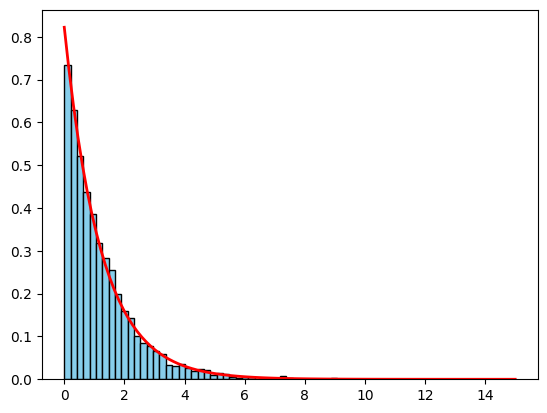

Probability of someone not dropping their phone in the first 2 years (using sampling): 0.1934
Probability of someone not dropping their phone in the first 2 years (using expon.cdf): 0.1931
Entropy (using numpy automatic integration): 1.196
Entropy (using sampling method): 1.191


In [173]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad
from scipy.stats import expon
from numpy import exp as ē
from numpy import sum as Σ
from numpy import array
from numpy import log as ln
from numpy import genfromtxt
from numpy import mean

X = np.reshape(genfromtxt('time_until_phone_drop_exam_4k.csv', delimiter='\n'), (-1,1))
n = X.shape[0]
μ = mean(X)


def ln_p(θ): # the log likelihood of joint
	return n*ln(θ) - θ*Σ(X)
def ᐁln_p(θ): # derivative of the log likelihood 
	return (n/θ - Σ(X))

θ = 2
η = 0.0001
for i in range(100):
	θ = θ + η*ᐁln_p(θ)
	
print('Using the mean method, the best θ = 1/μ = %.3f'%(1/μ))
print('Using Maximum Likelihood, the best θ = %.3f'%θ)
print('Probability of drop phone within 2 years %.3f'%expon.cdf(2, 0, μ))
print('Time until 90 percent of the population dropped their phone %.3f'%expon.ppf(0.9, 0, μ))


plt.hist(X, bins=50, density=True, color='skyblue', edgecolor='black')
x = np.linspace(0,15, 100)
y = θ*ē(-θ*x)
plt.plot(x, y, color='red', linewidth=2)
plt.show()


theta = 1 / np.mean(X)  

# samples from the uniform distribution between 0 and 2
samples = np.random.uniform(0, 2, 100000)
f_vals = theta * np.exp(-theta * samples) # compute f(x) with the generated samples
integral_estimate = 2 * np.mean(f_vals) # 2 E[f(x)] = the integral of f(x) from 0 to 2! 
print("Probability of someone not dropping their phone in the first 2 years (using sampling): %.4f" %( 1 - integral_estimate))

# probability using the CDF method
prob_not_dropped = 1 - expon.cdf(2, scale=1/theta)
print("Probability of someone not dropping their phone in the first 2 years (using expon.cdf): %.4f" %prob_not_dropped)
 
def p1(x, θ):
    return θ * ē(-θ * x)

def neg_ln_p1(x, θ):
    return p1(x, θ) * math.log(1/p1(x, θ))

θ = 0.822

# entropy using numpy automatic integration
result, _ = quad(neg_ln_p1, 0, 14, args=(θ,))
print("Entropy (using numpy automatic integration): %.3f" %result)

def exp_sampling(theta, n):
	u = np.random.uniform(0, 1, n)
	samples = -np.log(1 - u) / theta
	return samples

# entropy using sampling method
def entropy_sampling(samples):
    probabilities = np.array([p1(val, θ=0.822) for val in samples])
    log_probabilities = np.log(1 / probabilities)
    entropy = np.mean(log_probabilities)
    return entropy

samples = exp_sampling(θ, 100000)
entropy_sampled = entropy_sampling(samples)
print("Entropy (using sampling method): %.3f" %entropy_sampled)